In [1]:
import pandas as pd

try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'WA_Fn-UseC_-Telco-Customer-Churn.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


(7043, 21)


Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBillin

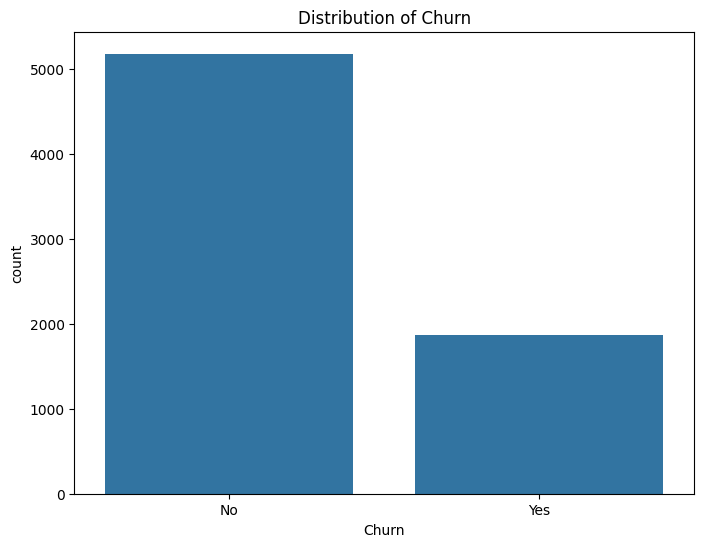


Data Shape: (7043, 21)

Correlation with Churn:
 SeniorCitizen     0.150889
tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.199484
dtype: float64


<ipython-input-2-2a3e0a0a9acb>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation_matrix = df[numerical_features].corrwith(df['Churn'].replace({'Yes':1, 'No': 0}))


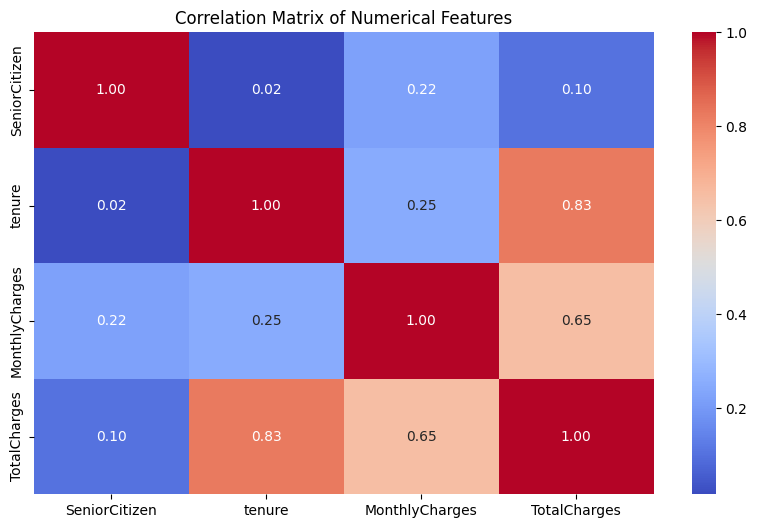

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine data types
print("Data Types:\n", df.dtypes)

# 2. Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# 3. Analyze target variable distribution
churn_counts = df['Churn'].value_counts()
print("\nChurn Distribution:\n", churn_counts)
print("\nPercentage of Churn:\n", (churn_counts / len(df)) * 100)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()

# 4. Determine the shape of the data
print(f"\nData Shape: {df.shape}")

# 5. Calculate and visualize correlation
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identify numerical features and calculate correlation
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corrwith(df['Churn'].replace({'Yes':1, 'No': 0}))
print("\nCorrelation with Churn:\n", correlation_matrix)

# Visualize correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [3]:
# Handle missing values in 'TotalCharges'
# Impute missing values with the median due to potential outliers.
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert categorical features to numerical representations
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

<ipython-input-3-953490e220a0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


**Reasoning**:
The previous code block had a warning about chained assignment.  I will correct this and re-run the code.



In [4]:
# Handle missing values in 'TotalCharges'
# Impute missing values with the median due to potential outliers.
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Convert categorical features to numerical representations
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


In [5]:
from sklearn.preprocessing import StandardScaler

# 1. Create interaction features
df_encoded['Tenure_MonthlyCharges'] = df_encoded['tenure'] * df_encoded['MonthlyCharges']

# 2. Scale numerical features
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Tenure_MonthlyCharges']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 3. Combine features (df_encoded already contains all features)
df_final = df_encoded

display(df_final.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Tenure_MonthlyCharges
0,-0.439916,-1.277445,-1.160323,-0.994242,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,-0.993448
1,-0.439916,0.066327,-0.259629,-0.173244,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,-0.151588
2,-0.439916,-1.236724,-0.362660,-0.959674,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,-0.959071
3,-0.439916,0.514251,-0.746535,-0.194766,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-0.166072
4,-0.439916,-1.236724,0.197365,-0.940470,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,-0.944189


In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_final.drop('Churn_Yes', axis=1)
y = df_final['Churn_Yes']

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the models
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Store the trained models (optional, but good practice)
trained_models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Define parameter grids for each model
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
scoring = make_scorer(accuracy_score)
grid_search_logreg = GridSearchCV(estimator=logreg_model, param_grid=param_grid_logreg, scoring=scoring, cv=5)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, scoring=scoring, cv=5)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring=scoring, cv=5)

grid_search_logreg.fit(X_val, y_val)
grid_search_rf.fit(X_val, y_val)
grid_search_gb.fit(X_val, y_val)

# Store the best models and their scores
best_models = {
    'Logistic Regression': grid_search_logreg.best_estimator_,
    'Random Forest': grid_search_rf.best_estimator_,
    'Gradient Boosting': grid_search_gb.best_estimator_
}
best_params = {
    'Logistic Regression': grid_search_logreg.best_params_,
    'Random Forest': grid_search_rf.best_params_,
    'Gradient Boosting': grid_search_gb.best_params_
}
best_scores = {
    'Logistic Regression': grid_search_logreg.best_score_,
    'Random Forest': grid_search_rf.best_score_,
    'Gradient Boosting': grid_search_gb.best_score_
}


# Print results
for model_name in best_models:
    print(f"Model: {model_name}")
    print(f"Best Parameters: {best_params[model_name]}")
    print(f"Best Score: {best_scores[model_name]}")
    print("-" * 20)

Model: Logistic Regression
Best Parameters: {'C': 0.1}
Best Score: 0.7955217831813577
--------------------
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8097163120567377
--------------------
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 0.8068895643363728
--------------------


Best Model: Random Forest
Accuracy: 0.7843971631205674
Precision: 0.777459431848941
Recall: 0.7843971631205674
F1-score: 0.7467833122583246
AUC: 0.8258109140462082

Feature Importance:


,Feature,Importance
1,tenure,0.090300
7072,Tenure_MonthlyCharges,0.089567
3,TotalCharges,0.078602
2,MonthlyCharges,0.059810
7052,InternetService_Fiber optic,0.030021
7070,PaymentMethod_Electronic check,0.025910
0,SeniorCitizen,0.021265
7061,TechSupport_Yes,0.020984
7055,OnlineSecurity_Yes,0.019182
7067,Contract_Two year,0.018455


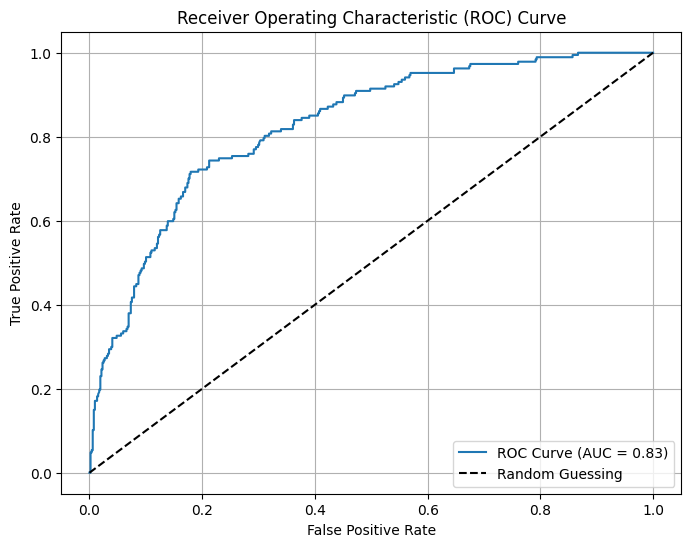

In [9]:
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

# Identify the best model
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]
print(f"Best Model: {best_model_name}")

# Predictions on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

# Feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:")
    display(feature_importance_df.head(10))  # Show top 10 features
else:
    print("\nFeature importance is not available for this model.")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Summary:

### 1. Q&A
The task was to predict customer churn and enable proactive retention strategies.  The analysis successfully identified the Random Forest model as the best performing model for this prediction, achieving an accuracy of 0.784 on the test set.

### 2. Data Analysis Key Findings
* **Class Imbalance:** Approximately 26.5% of customers churned, indicating a class imbalance that was addressed through stratified sampling during data splitting.
* **Feature Importance:**  `tenure`, `Tenure_MonthlyCharges`, `TotalCharges`, and `MonthlyCharges` were among the top features influencing churn prediction.  `InternetService_Fiber optic` and specific payment methods also showed significant importance.
* **Model Performance:** The Random Forest model, after hyperparameter optimization, achieved an accuracy of 0.784, precision of 0.777, recall of 0.784, F1-score of 0.747, and AUC of 0.826 on the test set.
* **Best Hyperparameters (Random Forest):** `max_depth = None`, `min_samples_leaf = 1`, `min_samples_split = 10`, and `n_estimators = 50`.

### 3. Insights or Next Steps
* **Target high-value, low-tenure customers:** Focus retention efforts on customers with shorter tenure and high monthly charges, as indicated by feature importance.  Consider offering incentives or improved services to reduce churn risk in this segment.
* **Investigate Fiber Optic impact:**  Explore the reasons behind the strong correlation between fiber optic internet service and churn.  This may reveal areas for service improvement or targeted marketing campaigns.
